In [1]:
import pickle

# Load the contents of messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Print the contents of message_list
print(message_list)

import torch

# Load the contents of parsed_smell_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_embeddings.pt')

# Print the embeddings
print(embeddings)

# Load the contents of parsed_smell_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_identifier_embeddings.pt')

# Print the embeddings
print(embeddings)

0       4
1       3
2       0
3       2
4       4
       ..
1193    2
1194    2
1195    2
1196    2
1197    2
Name: message_encoded, Length: 1198, dtype: int64
tensor([[-0.0950,  0.6250,  0.5913,  ..., -0.2796, -0.2381,  0.4071],
        [-0.2020,  0.1644,  1.1535,  ..., -0.3008, -0.0297,  0.5221],
        [-0.0143, -0.2363,  1.6680,  ..., -0.3705, -0.5433, -0.1417],
        ...,
        [-0.2735,  0.2333,  1.3529,  ..., -0.6721, -0.3709,  0.5369],
        [-0.1369,  0.7097,  1.1493,  ..., -0.4443, -0.7678,  0.2357],
        [-0.1369,  0.7097,  1.1493,  ..., -0.4443, -0.7678,  0.2357]])
tensor([[-0.1174,  0.6704,  0.8038,  ..., -0.4725, -0.2390,  0.3589],
        [-0.6199,  0.3999,  1.2910,  ..., -0.5682, -0.1304,  0.6397],
        [-0.0143, -0.2363,  1.6680,  ..., -0.3705, -0.5433, -0.1417],
        ...,
        [-0.3621,  0.4559,  1.3794,  ..., -0.6402, -0.4670,  0.5768],
        [-0.2604,  0.7622,  1.2828,  ..., -0.4707, -0.7316,  0.2586],
        [-0.2604,  0.7622,  1.2828,  ..., -

## Cosine Similarity (ID-less)

Accuracy: 74.58%
Precision: 0.67
Recall: 0.71
F1-score: 0.69


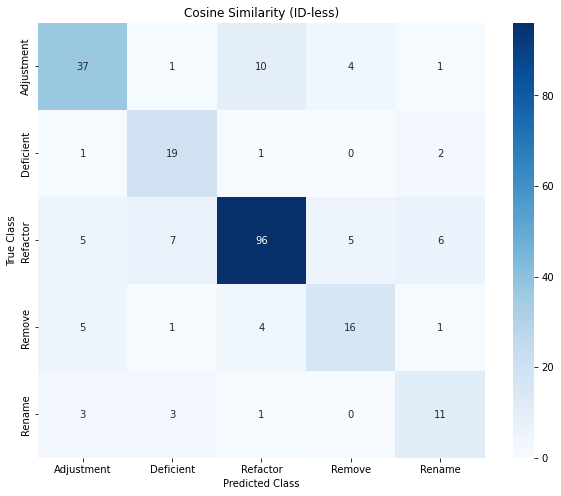

In [203]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import torch
import pickle

# Load the embeddings from parsed_smell_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_embeddings': embeddings.tolist(),
    'message_encoded': message_list
})

# Define the input features (X) and labels (y)
X = np.array(data['parsed_smell_embeddings'])
y = np.array(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

correct_predictions = 0

predicted_labels = []
for i in range(len(X_test)):
    embedding1 = X_test[i]
    message1 = y_test[i]
    
    similarities = []
    for j in range(len(X_train)):
        embedding2 = X_train[j]
        similarity = cosine_similarity([embedding1], [embedding2])[0][0]
        similarities.append(similarity)
    
    most_similar_index = np.argmax(similarities)
    most_similar_message = y_train[most_similar_index]
    
    if message1 == most_similar_message:
        correct_predictions += 1
    
    predicted_labels.append(most_similar_message)

accuracy = correct_predictions / len(X_test)
precision = precision_score(y_test, predicted_labels, average='macro')
recall = recall_score(y_test, predicted_labels, average='macro')
f1 = f1_score(y_test, predicted_labels, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)

# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test, predicted_labels)
classes = [encoding_vocabulary[i] for i in np.unique(y_test)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Cosine Similarity (ID-less)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



## Cosine Similarity (with ID)

Accuracy: 75.83%
Precision: 0.75
Recall: 0.65
F1-score: 0.69


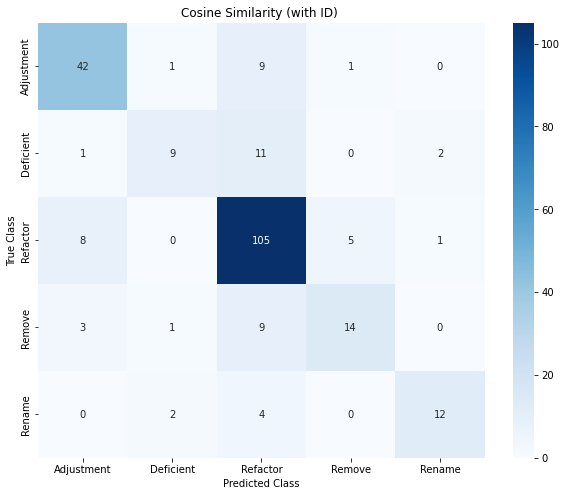

In [202]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import torch
import pickle

# Load the embeddings from parsed_smell_identifier_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_identifier_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_identifier_embeddings.pt': embeddings.tolist(),
    'message_encoded': message_list
})

# Define the input features (X) and labels (y)
X = np.array(data['parsed_smell_identifier_embeddings.pt'])
y = np.array(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

correct_predictions = 0

predicted_labels = []
for i in range(len(X_test)):
    embedding1 = X_test[i]
    message1 = y_test[i]
    
    similarities = []
    for j in range(len(X_train)):
        embedding2 = X_train[j]
        similarity = cosine_similarity([embedding1], [embedding2])[0][0]
        similarities.append(similarity)
    
    most_similar_index = np.argmax(similarities)
    most_similar_message = y_train[most_similar_index]
    
    if message1 == most_similar_message:
        correct_predictions += 1
    
    predicted_labels.append(most_similar_message)

accuracy = correct_predictions / len(X_test)
precision = precision_score(y_test, predicted_labels, average='macro')
recall = recall_score(y_test, predicted_labels, average='macro')
f1 = f1_score(y_test, predicted_labels, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)

# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test, predicted_labels)
classes = [encoding_vocabulary[i] for i in np.unique(y_test)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Cosine Similarity (with ID) ")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()





## K-nearest Neighbors (ID-less)

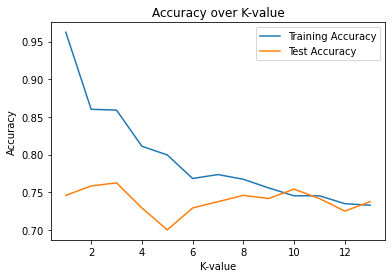

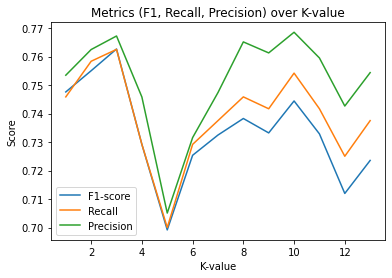

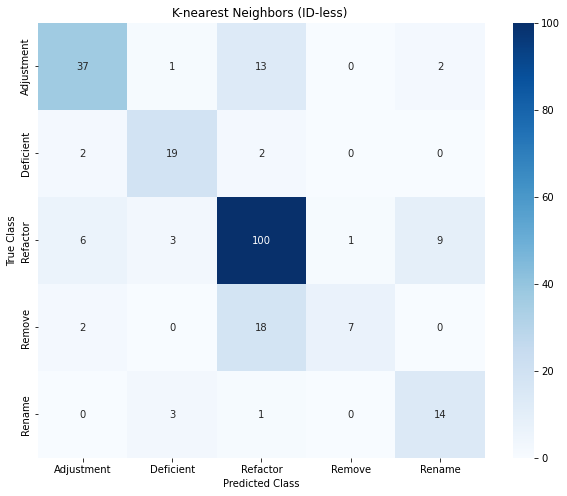

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import torch
import pickle

# Load the embeddings from parsed_smell_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_embeddings': embeddings.tolist(),
    'message_encoded': message_list
})

# Split the data into features (embeddings) and labels (messages)
X = np.array(data['parsed_smell_embeddings'].tolist())
y = np.array(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of K-values
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Define empty lists to store evaluation metrics
accuracy_train_list = []
accuracy_test_list = []
precision_list = []
recall_list = []
f1_list = []

for k in k_values:
    # Create an instance of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the training and validation data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate the evaluation metrics for training data
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Calculate the evaluation metrics for validation data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Append the metrics to the corresponding lists
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the accuracy over K-values
plt.plot(k_values, accuracy_train_list, label='Training Accuracy')
plt.plot(k_values, accuracy_test_list, label='Test Accuracy')
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.title("Accuracy over K-value")
plt.legend()
plt.show()

# Plot the f1, recall, and precision over K-values
plt.plot(k_values, f1_list, label='F1-score')
plt.plot(k_values, recall_list, label='Recall')
plt.plot(k_values, precision_list, label='Precision')
plt.xlabel("K-value")
plt.ylabel("Score")
plt.title("Metrics (F1, Recall, Precision) over K-value")
plt.legend()
plt.show()

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)

# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test, y_test_pred )
classes = [encoding_vocabulary[i] for i in np.unique(y_test)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("K-nearest Neighbors (ID-less) ")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


## K-nearest Neighbors (with Id)

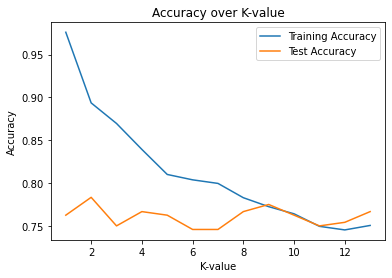

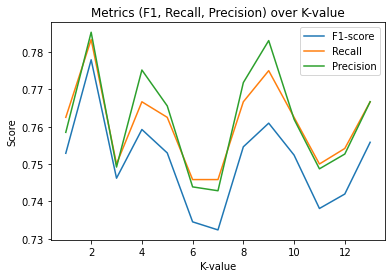

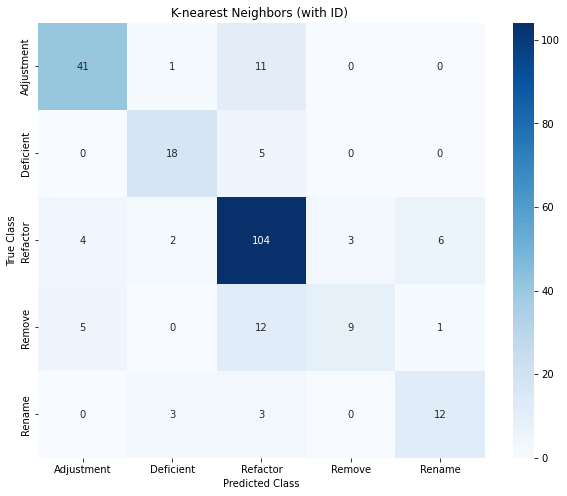

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import torch
import pickle

# Load the embeddings from parsed_smell_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_identifier_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_identifier_embeddings': embeddings.tolist(),
    'message_encoded': message_list
})

# Split the data into features (embeddings) and labels (messages)
X = np.array(data['parsed_smell_identifier_embeddings'].tolist())
y = np.array(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of K-values
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Define empty lists to store evaluation metrics
accuracy_train_list = []
accuracy_test_list = []
precision_list = []
recall_list = []
f1_list = []

for k in k_values:
    # Create an instance of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model with the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the training and validation data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate the evaluation metrics for training data
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Calculate the evaluation metrics for validation data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Append the metrics to the corresponding lists
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the accuracy over K-values
plt.plot(k_values, accuracy_train_list, label='Training Accuracy')
plt.plot(k_values, accuracy_test_list, label='Test Accuracy')
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.title("Accuracy over K-value")
plt.legend()
plt.show()

# Plot the f1, recall, and precision over K-values
plt.plot(k_values, f1_list, label='F1-score')
plt.plot(k_values, recall_list, label='Recall')
plt.plot(k_values, precision_list, label='Precision')
plt.xlabel("K-value")
plt.ylabel("Score")
plt.title("Metrics (F1, Recall, Precision) over K-value")
plt.legend()
plt.show()

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)

# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test, y_test_pred )
classes = [encoding_vocabulary[i] for i in np.unique(y_test)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("K-nearest Neighbors (with ID) ")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



## LSTM (ID-less)

Epoch 1/30, Train Loss: 1.3445, Train Accuracy: 0.5334, Test Accuracy: 0.5458
Epoch 2/30, Train Loss: 1.1468, Train Accuracy: 0.6190, Test Accuracy: 0.6417
Epoch 3/30, Train Loss: 0.9958, Train Accuracy: 0.6983, Test Accuracy: 0.7000
Epoch 4/30, Train Loss: 0.8868, Train Accuracy: 0.7182, Test Accuracy: 0.7375
Epoch 5/30, Train Loss: 0.8317, Train Accuracy: 0.7317, Test Accuracy: 0.7542
Epoch 6/30, Train Loss: 0.7838, Train Accuracy: 0.7307, Test Accuracy: 0.7583
Epoch 7/30, Train Loss: 0.7649, Train Accuracy: 0.7432, Test Accuracy: 0.7667
Epoch 8/30, Train Loss: 0.7390, Train Accuracy: 0.7390, Test Accuracy: 0.7542
Epoch 9/30, Train Loss: 0.6958, Train Accuracy: 0.7474, Test Accuracy: 0.7625
Epoch 10/30, Train Loss: 0.6702, Train Accuracy: 0.7526, Test Accuracy: 0.7542
Epoch 11/30, Train Loss: 0.6551, Train Accuracy: 0.7829, Test Accuracy: 0.7917
Epoch 12/30, Train Loss: 0.6197, Train Accuracy: 0.7891, Test Accuracy: 0.7792
Epoch 13/30, Train Loss: 0.6235, Train Accuracy: 0.7839, Test

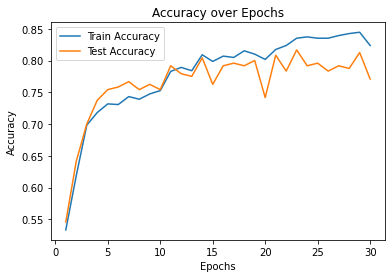

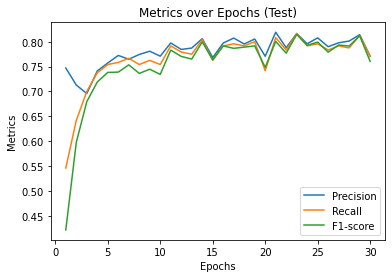

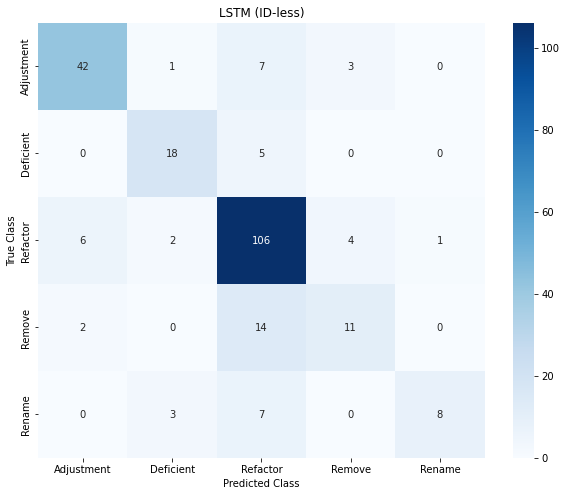

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

# Load the embeddings from parsed_smell_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_embeddings.pt': embeddings.tolist(),
    'message_encoded': message_list
})

# Split the data into features (embeddings) and labels (messages)
X = np.array(data['parsed_smell_embeddings.pt'].tolist())
y = np.array(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).unsqueeze(1)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test).unsqueeze(1)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

# Define the model parameters
input_dim = X_train_tensor.shape[2]
hidden_dim = 128
output_dim = len(np.unique(y_train))

# Create the LSTM model
model = LSTMModel(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader objects
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define empty lists to store evaluation metrics
train_accuracy_list = []
val_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Training the LSTM model
num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    # Evaluate the LSTM model
    with torch.no_grad():
        model.eval()
        train_outputs = model(X_train_tensor.float())
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_accuracy = (train_predicted == y_train_tensor).sum().item() / len(y_train_tensor)

        val_outputs = model(X_test_tensor.float())
        _, val_predicted = torch.max(val_outputs.data, 1)
        val_accuracy = (val_predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        train_precision = precision_score(y_train_tensor, train_predicted, average='weighted', zero_division=1)
        val_precision = precision_score(y_test_tensor, val_predicted, average='weighted', zero_division=1)

        train_recall = recall_score(y_train_tensor, train_predicted, average='weighted')
        val_recall = recall_score(y_test_tensor, val_predicted, average='weighted')

        train_f1 = f1_score(y_train_tensor, train_predicted, average='weighted', zero_division=1)
        val_f1 = f1_score(y_test_tensor, val_predicted, average='weighted', zero_division=1)

        train_accuracy_list.append(train_accuracy)
        val_accuracy_list.append(val_accuracy)
        precision_list.append(val_precision)
        recall_list.append(val_recall)
        f1_list.append(val_f1)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {val_accuracy:.4f}")

# Plot the accuracy over epochs for training and validation
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_list, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

# Plot precision, recall, and F1-score over epochs for validation
plt.plot(range(1, num_epochs + 1), precision_list, label='Precision')
plt.plot(range(1, num_epochs + 1), recall_list, label='Recall')
plt.plot(range(1, num_epochs + 1), f1_list, label='F1-score')
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Metrics over Epochs (Test)")
plt.legend()
plt.show()

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)
    

# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test_tensor, val_predicted)
classes = [encoding_vocabulary[i] for i in np.unique(y_test_tensor)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("LSTM (ID-less)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## LSTM (with ID)

Epoch 1/30, Train Loss: 1.3231, Train Accuracy: 0.5188, Test Accuracy: 0.5417
Epoch 2/30, Train Loss: 1.1125, Train Accuracy: 0.6294, Test Accuracy: 0.6750
Epoch 3/30, Train Loss: 0.9515, Train Accuracy: 0.6816, Test Accuracy: 0.7208
Epoch 4/30, Train Loss: 0.8511, Train Accuracy: 0.7265, Test Accuracy: 0.7250
Epoch 5/30, Train Loss: 0.7737, Train Accuracy: 0.7307, Test Accuracy: 0.7208
Epoch 6/30, Train Loss: 0.7270, Train Accuracy: 0.7808, Test Accuracy: 0.7417
Epoch 7/30, Train Loss: 0.6870, Train Accuracy: 0.7756, Test Accuracy: 0.7542
Epoch 8/30, Train Loss: 0.6599, Train Accuracy: 0.7818, Test Accuracy: 0.7708
Epoch 9/30, Train Loss: 0.6096, Train Accuracy: 0.8038, Test Accuracy: 0.7750
Epoch 10/30, Train Loss: 0.5771, Train Accuracy: 0.8267, Test Accuracy: 0.7875
Epoch 11/30, Train Loss: 0.5548, Train Accuracy: 0.8100, Test Accuracy: 0.7542
Epoch 12/30, Train Loss: 0.5432, Train Accuracy: 0.8403, Test Accuracy: 0.7500
Epoch 13/30, Train Loss: 0.5160, Train Accuracy: 0.8225, Test

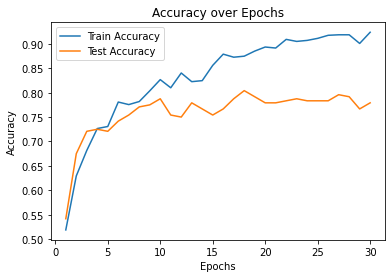

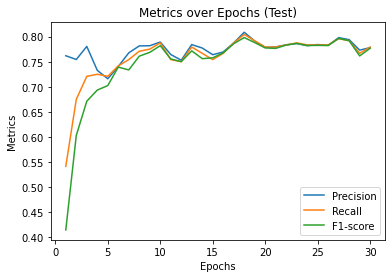

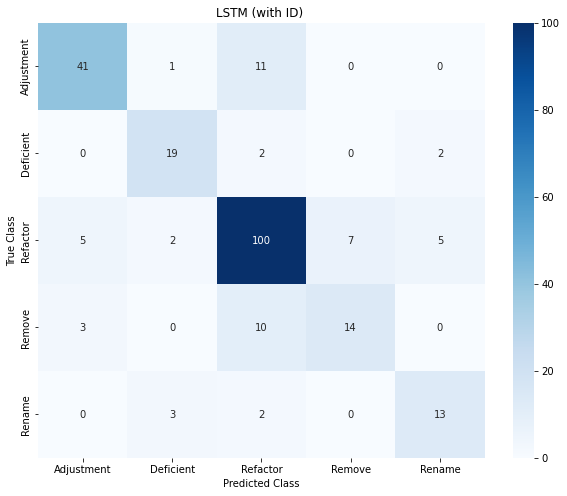

In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the embeddings from parsed_smell_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_identifier_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_identifier_embeddings.pt': embeddings.tolist(),
    'message_encoded': message_list
})

# Split the data into features (embeddings) and labels (messages)
X = np.array(data['parsed_smell_identifier_embeddings.pt'].tolist())
y = np.array(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).unsqueeze(1)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test).unsqueeze(1)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

# Define the model parameters
input_dim = X_train_tensor.shape[2]
hidden_dim = 128
output_dim = len(np.unique(y_train))

# Create the LSTM model
model = LSTMModel(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader objects
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define empty lists to store evaluation metrics
train_accuracy_list = []
val_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Training the LSTM model
num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    # Evaluate the LSTM model
    with torch.no_grad():
        model.eval()
        train_outputs = model(X_train_tensor.float())
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_accuracy = (train_predicted == y_train_tensor).sum().item() / len(y_train_tensor)

        val_outputs = model(X_test_tensor.float())
        _, val_predicted = torch.max(val_outputs.data, 1)
        val_accuracy = (val_predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        train_precision = precision_score(y_train_tensor, train_predicted, average='weighted', zero_division=1)
        val_precision = precision_score(y_test_tensor, val_predicted, average='weighted', zero_division=1)

        train_recall = recall_score(y_train_tensor, train_predicted, average='weighted')
        val_recall = recall_score(y_test_tensor, val_predicted, average='weighted')

        train_f1 = f1_score(y_train_tensor, train_predicted, average='weighted', zero_division=1)
        val_f1 = f1_score(y_test_tensor, val_predicted, average='weighted', zero_division=1)

        train_accuracy_list.append(train_accuracy)
        val_accuracy_list.append(val_accuracy)
        precision_list.append(val_precision)
        recall_list.append(val_recall)
        f1_list.append(val_f1)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}, "
        f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {val_accuracy:.4f}")
        
# Plot the accuracy over epochs for training and validation
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_list, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

# Plot precision, recall, and F1-score over epochs for validation
plt.plot(range(1, num_epochs + 1), precision_list, label='Precision')
plt.plot(range(1, num_epochs + 1), recall_list, label='Recall')
plt.plot(range(1, num_epochs + 1), f1_list, label='F1-score')
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Metrics over Epochs (Test)")
plt.legend()
plt.show()

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)
    

# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test_tensor, val_predicted)
classes = [encoding_vocabulary[i] for i in np.unique(y_test_tensor)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("LSTM (with ID) ")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## BERT Transformers (ID-less)

Epoch 1/30, Train Loss: 1.2812, Train Accuracy: 0.5543, Test Accuracy: 0.5958
Epoch 2/30, Train Loss: 1.0558, Train Accuracy: 0.6691, Test Accuracy: 0.6583
Epoch 3/30, Train Loss: 0.9362, Train Accuracy: 0.6942, Test Accuracy: 0.7042
Epoch 4/30, Train Loss: 0.8768, Train Accuracy: 0.7088, Test Accuracy: 0.7250
Epoch 5/30, Train Loss: 0.8516, Train Accuracy: 0.6994, Test Accuracy: 0.7042
Epoch 6/30, Train Loss: 0.8335, Train Accuracy: 0.7537, Test Accuracy: 0.7417
Epoch 7/30, Train Loss: 0.7773, Train Accuracy: 0.7484, Test Accuracy: 0.7333
Epoch 8/30, Train Loss: 0.7579, Train Accuracy: 0.7735, Test Accuracy: 0.7583
Epoch 9/30, Train Loss: 0.7184, Train Accuracy: 0.7662, Test Accuracy: 0.7542
Epoch 10/30, Train Loss: 0.7214, Train Accuracy: 0.7568, Test Accuracy: 0.7458
Epoch 11/30, Train Loss: 0.6854, Train Accuracy: 0.7818, Test Accuracy: 0.7667
Epoch 12/30, Train Loss: 0.6575, Train Accuracy: 0.7818, Test Accuracy: 0.7750
Epoch 13/30, Train Loss: 0.6534, Train Accuracy: 0.7923, Test

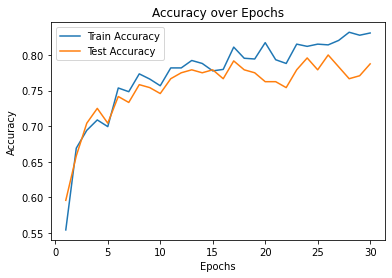

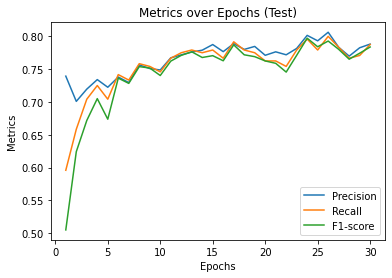

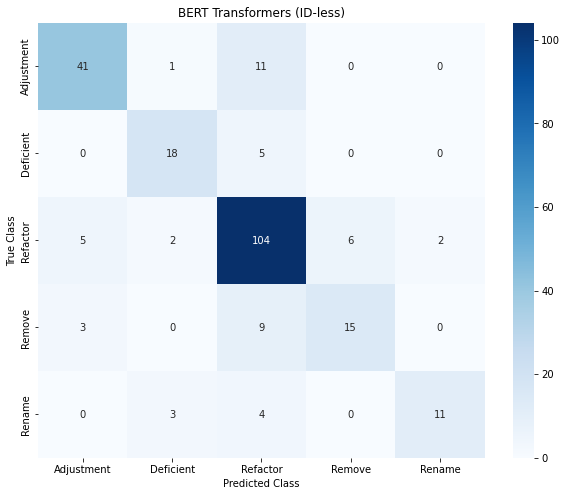

In [10]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification
import pickle

# Load the embeddings from parsed_smell_identifier_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_embeddings.pt': embeddings.tolist(),
    'message_encoded': message_list
})

# Split the data into features (embeddings) and labels (messages)
X = torch.tensor(data['parsed_smell_embeddings.pt'].tolist())
y = torch.tensor(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
class BertClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BertClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output(x)
        return x

# Define the model parameters
input_dim = X_train.shape[1]
hidden_dim = 256
output_dim = len(torch.unique(y_train))

# Create an instance of the model
model = BertClassifier(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader objects
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define empty lists to store evaluation metrics
train_accuracy_list = []
val_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Training the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train.float())
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_accuracy = accuracy_score(y_train, train_predicted)
        train_precision = precision_score(y_train, train_predicted, average='weighted', zero_division=1)
        train_recall = recall_score(y_train, train_predicted, average='weighted')
        train_f1 = f1_score(y_train, train_predicted, average='weighted', zero_division=1)

        val_outputs = model(X_test.float())
        _, val_predicted = torch.max(val_outputs.data, 1)
        val_accuracy = accuracy_score(y_test, val_predicted)
        val_precision = precision_score(y_test, val_predicted, average='weighted', zero_division=1)
        val_recall = recall_score(y_test, val_predicted, average='weighted')
        val_f1 = f1_score(y_test, val_predicted, average='weighted', zero_division=1)

        train_accuracy_list.append(train_accuracy)
        val_accuracy_list.append(val_accuracy)
        precision_list.append(val_precision)
        recall_list.append(val_recall)
        f1_list.append(val_f1)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {val_accuracy:.4f}")

# Plot the accuracy over epochs for training and validation
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_list, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

# Plot precision, recall, and F1-score over epochs for validation
plt.plot(range(1, num_epochs + 1), precision_list, label='Precision')
plt.plot(range(1, num_epochs + 1), recall_list, label='Recall')
plt.plot(range(1, num_epochs + 1), f1_list, label='F1-score')
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Metrics over Epochs (Test)")
plt.legend()
plt.show()

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)
    
# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test, val_predicted)
classes = [encoding_vocabulary[i] for i in torch.unique(y_test)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("BERT Transformers (ID-less)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



## BERT Transformers (with ID)

Epoch 1/30, Train Loss: 1.2451, Train Accuracy: 0.6253, Test Accuracy: 0.6750
Epoch 2/30, Train Loss: 0.9772, Train Accuracy: 0.6514, Test Accuracy: 0.6917
Epoch 3/30, Train Loss: 0.8893, Train Accuracy: 0.7203, Test Accuracy: 0.7125
Epoch 4/30, Train Loss: 0.8101, Train Accuracy: 0.7307, Test Accuracy: 0.7458
Epoch 5/30, Train Loss: 0.7494, Train Accuracy: 0.7620, Test Accuracy: 0.7333
Epoch 6/30, Train Loss: 0.7446, Train Accuracy: 0.7307, Test Accuracy: 0.7417
Epoch 7/30, Train Loss: 0.6836, Train Accuracy: 0.7860, Test Accuracy: 0.7208
Epoch 8/30, Train Loss: 0.6532, Train Accuracy: 0.7745, Test Accuracy: 0.7625
Epoch 9/30, Train Loss: 0.6160, Train Accuracy: 0.8079, Test Accuracy: 0.7625
Epoch 10/30, Train Loss: 0.6205, Train Accuracy: 0.8121, Test Accuracy: 0.7542
Epoch 11/30, Train Loss: 0.5762, Train Accuracy: 0.8246, Test Accuracy: 0.7417
Epoch 12/30, Train Loss: 0.5572, Train Accuracy: 0.7912, Test Accuracy: 0.7667
Epoch 13/30, Train Loss: 0.5486, Train Accuracy: 0.8225, Test

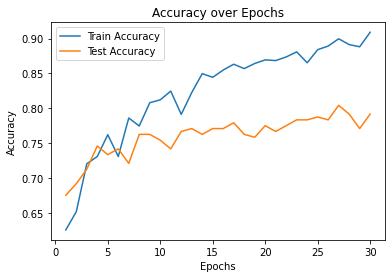

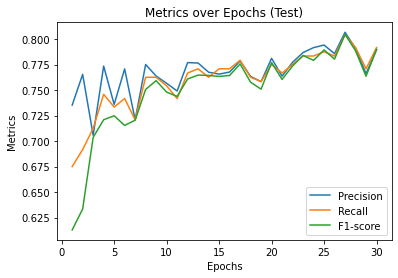

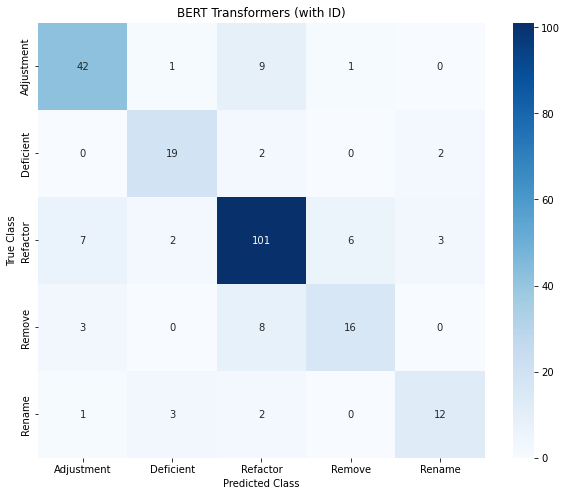

In [11]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification
import pickle

# Load the embeddings from parsed_smell_identifier_embeddings.pt
embeddings = torch.load('AST_Data/parsed_smell_identifier_embeddings.pt')

# Load the encoded messages from messagelist.pkl
with open('AST_Data/messagelist.pkl', 'rb') as f:
    message_list = pickle.load(f)

# Combine the embeddings and encoded messages into a DataFrame
data = pd.DataFrame({
    'parsed_smell_identifier_embeddings.pt': embeddings.tolist(),
    'message_encoded': message_list
})

# Split the data into features (embeddings) and labels (messages)
X = torch.tensor(data['parsed_smell_identifier_embeddings.pt'].tolist())
y = torch.tensor(data['message_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
class BertClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BertClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output(x)
        return x

# Define the model parameters
input_dim = X_train.shape[1]
hidden_dim = 256
output_dim = len(torch.unique(y_train))

# Create an instance of the model
model = BertClassifier(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader objects
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define empty lists to store evaluation metrics
train_accuracy_list = []
val_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Training the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train.float())
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_accuracy = accuracy_score(y_train, train_predicted)
        train_precision = precision_score(y_train, train_predicted, average='weighted', zero_division=1)
        train_recall = recall_score(y_train, train_predicted, average='weighted')
        train_f1 = f1_score(y_train, train_predicted, average='weighted', zero_division=1)

        val_outputs = model(X_test.float())
        _, val_predicted = torch.max(val_outputs.data, 1)
        val_accuracy = accuracy_score(y_test, val_predicted)
        val_precision = precision_score(y_test, val_predicted, average='weighted', zero_division=1)
        val_recall = recall_score(y_test, val_predicted, average='weighted')
        val_f1 = f1_score(y_test, val_predicted, average='weighted', zero_division=1)

        train_accuracy_list.append(train_accuracy)
        val_accuracy_list.append(val_accuracy)
        precision_list.append(val_precision)
        recall_list.append(val_recall)
        f1_list.append(val_f1)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {val_accuracy:.4f}")

# Plot the accuracy over epochs for training and validation
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_list, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

# Plot precision, recall, and F1-score over epochs for validation
plt.plot(range(1, num_epochs + 1), precision_list, label='Precision')
plt.plot(range(1, num_epochs + 1), recall_list, label='Recall')
plt.plot(range(1, num_epochs + 1), f1_list, label='F1-score')
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Metrics over Epochs (Test)")
plt.legend()
plt.show()

# Load the message encoding vocabulary
with open('AST_Data/message_encoding_vocabulary.pkl', 'rb') as f:
    encoding_vocabulary = pickle.load(f)

# Compute the confusion matrix for validation data
cm = confusion_matrix(y_test, val_predicted)
classes = [encoding_vocabulary[i] for i in torch.unique(y_test)]
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("BERT Transformers (with ID)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
